In [ ]:
#Primero, instalamos el paquete para analizar la actividad de spotify

!pip install Spotipy

In [38]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [39]:
#Creamos una app en Spotify, obteniendo así el Client ID, 

cid ='097b3bc4fad845c583495fa5c74534de' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = 'de9c555929204c678b53702cfcdc2d27' # Client Secret; copy this from your app
username = 'taiosuper' # Your Spotify username

scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='http://localhost:7777/callback'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [5]:
#Creamos el DataFrame con la playlist de mi usuario (en este caso 'La Posta' y lo features de las canciones)
import pandas as pd

sourcePlaylistID = '4YJXXlrRTBEhbDmcCGMuX1'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [10]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Takin' Care Of Business,0.734,0.794,10,-12.107,1,0.0659,0.078200,0.000003,0.1560,0.962,132.028,audio_features,2OURxbygQXOwAMsAHHDooC,spotify:track:2OURxbygQXOwAMsAHHDooC,https://api.spotify.com/v1/tracks/2OURxbygQXOw...,https://api.spotify.com/v1/audio-analysis/2OUR...,285613,4
Tom Sawyer,0.536,0.915,9,-6.199,1,0.0379,0.000974,0.013900,0.2010,0.643,87.561,audio_features,1NSXPZZHSIfvEqCSxiDop7,spotify:track:1NSXPZZHSIfvEqCSxiDop7,https://api.spotify.com/v1/tracks/1NSXPZZHSIfv...,https://api.spotify.com/v1/audio-analysis/1NSX...,272880,4
Heaven and Hell - 2008 Remaster,0.329,0.673,3,-8.465,0,0.0296,0.023900,0.109000,0.1380,0.323,91.122,audio_features,3Jl5GohfNwozDmpzmQBLDI,spotify:track:3Jl5GohfNwozDmpzmQBLDI,https://api.spotify.com/v1/tracks/3Jl5GohfNwoz...,https://api.spotify.com/v1/audio-analysis/3Jl5...,419933,4
Wishing Well - 2008 Remaster,0.425,0.928,3,-5.973,0,0.0540,0.000269,0.000131,0.2600,0.646,143.167,audio_features,6CtaPSyIEzRXjvwbPm6FDG,spotify:track:6CtaPSyIEzRXjvwbPm6FDG,https://api.spotify.com/v1/tracks/6CtaPSyIEzRX...,https://api.spotify.com/v1/audio-analysis/6Cta...,247173,4
Pinball Wizard,0.535,0.715,2,-9.202,1,0.0354,0.020500,0.000000,0.2010,0.490,123.947,audio_features,2CSLqGz5zyqU0jyEgYRrou,spotify:track:2CSLqGz5zyqU0jyEgYRrou,https://api.spotify.com/v1/tracks/2CSLqGz5zyqU...,https://api.spotify.com/v1/audio-analysis/2CSL...,183202,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Buzzsaw,0.481,0.895,4,-8.401,0,0.0384,0.006460,0.772000,0.1560,0.849,149.617,audio_features,52xHDE9DVsxCaYmEaefxTN,spotify:track:52xHDE9DVsxCaYmEaefxTN,https://api.spotify.com/v1/tracks/52xHDE9DVsxC...,https://api.spotify.com/v1/audio-analysis/52xH...,176373,4
You Win,0.732,0.801,0,-7.447,1,0.0359,0.221000,0.002100,0.0754,0.962,141.693,audio_features,06Tm0VJTIinzEKPc0yBZXL,spotify:track:06Tm0VJTIinzEKPc0yBZXL,https://api.spotify.com/v1/tracks/06Tm0VJTIinz...,https://api.spotify.com/v1/audio-analysis/06Tm...,238560,4
Pulp Wood,0.542,0.681,11,-12.504,0,0.0501,0.008220,0.767000,0.1040,0.701,118.986,audio_features,3ZNDzqnK9uD8LG6zD69rdb,spotify:track:3ZNDzqnK9uD8LG6zD69rdb,https://api.spotify.com/v1/tracks/3ZNDzqnK9uD8...,https://api.spotify.com/v1/audio-analysis/3ZND...,192907,4
Texas Flyer,0.639,0.520,8,-12.453,1,0.0469,0.032600,0.402000,0.1330,0.885,113.262,audio_features,1HYEYBb9P6P4nNuNw4OPTr,spotify:track:1HYEYBb9P6P4nNuNw4OPTr,https://api.spotify.com/v1/tracks/1HYEYBb9P6P4...,https://api.spotify.com/v1/audio-analysis/1HYE...,227893,4


In [8]:
#Miramos la cantidad creada de elementos. En este caso fueron 100 registros con 18 columnas.
playlist_df.shape

(100, 18)

In [14]:
playlist_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.551745,0.720270,5.840000,-9.006990,0.690000,0.055844,0.158704,0.125801,0.229065,0.725740,125.69408,240142.430000,3.920000
std,0.165996,0.173838,3.320338,3.065454,0.464823,0.044556,0.214413,0.251783,0.202943,0.209118,25.26564,80002.902952,0.442217
min,0.088500,0.327000,0.000000,-16.943000,0.000000,0.026000,0.000127,0.000000,0.035200,0.118000,74.56300,114056.000000,1.000000
25%,0.458250,0.588750,3.000000,-11.075500,0.000000,0.033650,0.008068,0.000058,0.092775,0.602000,113.74650,176099.750000,4.000000
50%,0.548500,0.728500,6.500000,-9.245000,1.000000,0.040550,0.048550,0.008165,0.156000,0.755000,126.91850,230873.500000,4.000000
75%,0.668750,0.888000,9.000000,-6.953750,1.000000,0.057950,0.224250,0.110000,0.299750,0.899500,142.69600,281093.250000,4.000000
max,0.852000,0.985000,11.000000,-2.737000,1.000000,0.309000,0.815000,0.978000,0.978000,0.987000,179.50100,478067.000000,4.000000


In [33]:
#Importo las librerías de Sklearn para normalizar los valores y para utilizar el método de K-means.
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

col_features = ['danceability', 'energy', 'valence', 'loudness']

X = MinMaxScaler().fit_transform(playlist_df[col_features])

kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=50).fit(X)

playlist_df['kmeans'] = kmeans.labels_

In [36]:
playlist_df.groupby(['kmeans']).mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
kmeans,,,,,,,,,,,,,
0,0.590607,0.610967,5.540984,-10.508197,0.672131,0.048549,0.184269,0.115970,0.187895,0.722213,120.961213,247844.622951,3.868852
1,0.490962,0.891231,6.307692,-6.658949,0.717949,0.067254,0.118718,0.141177,0.293459,0.731256,133.096769,228095.410256,4.000000


No handles with labels found to put in legend.


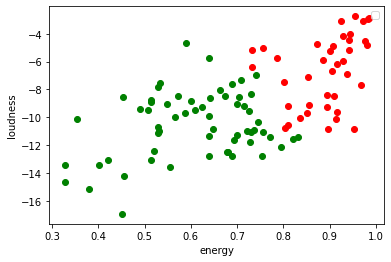

In [34]:
from matplotlib import pyplot as plt
cluster_0 = playlist_df[playlist_df['kmeans']==0]
cluster_1  = playlist_df[playlist_df['kmeans']==1]

plt.xlabel('energy')
plt.ylabel('loudness')
plt.scatter(cluster_0.energy,cluster_0.loudness,color='green')
plt.scatter(cluster_1.energy,cluster_1.loudness,color='red')
plt.legend()

In [41]:
#Obtaining the ids of the songs and conver the id dataframe column to a list.
ids_0 = cluster_0['id'].tolist()
ids_1 = cluster_1['id'].tolist()
#Creating 2 new playlists on my Spotify User
pl_tranqui = sp.user_playlist_create(user=username,
                                           name="Experimento #1 - Lista tranqui :)")
pl_punchi = sp.user_playlist_create(user=username,
                                            name="Experimento #1 - Lista punchi :)")
#Adding the tracks into the playlists
#For Punchi Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_punchi['id'],
                            tracks=ids_1)
#For Tranqui Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_tranqui['id'],
                            tracks=ids_0)

{'snapshot_id': 'MixkYWNkMTA1NDQxMGI3ODYwMzIwZTM3OTQzN2ZkNDgzMzE4NjZiNjEy'}